# DNN

##### 필기체를 분류하는 DNN 구현

In [1]:
#기본 파라미터 설정

Nin = 784
Nh_l = [100, 50]
number_of_class = 10
Nout = number_of_class

In [5]:
# 분류 DNN 모델 구현
from keras import layers, models

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin, ), name='Hidden-1'))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [3]:
# 데이터 준비
import numpy as np
from keras import datasets
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

L, W, H = X_train.shape
X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# 분류 DNN 학습 및 성능 평가

model = DNN(Nin, Nh_l, Nout)
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_split=0.2)
performace_test = model.evaluate(X_test, y_test, batch_size=100)
print('Test Loss and Accuracy : ', performace_test)

Epoch 1/10
480/480 [==============================] - 3s 6ms/step - loss: 0.3719 - accuracy: 0.8932 - val_loss: 0.1823 - val_accuracy: 0.9490
Epoch 2/10
480/480 [==============================] - 2s 5ms/step - loss: 0.1566 - accuracy: 0.9540 - val_loss: 0.1373 - val_accuracy: 0.9607
Epoch 3/10
480/480 [==============================] - 2s 5ms/step - loss: 0.1121 - accuracy: 0.9679 - val_loss: 0.1216 - val_accuracy: 0.9653
Epoch 4/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0873 - accuracy: 0.9736 - val_loss: 0.1095 - val_accuracy: 0.9659
Epoch 5/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0678 - accuracy: 0.9794 - val_loss: 0.1015 - val_accuracy: 0.9703
Epoch 6/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0565 - accuracy: 0.9830 - val_loss: 0.0966 - val_accuracy: 0.9705
Epoch 7/10
480/480 [==============================] - 2s 5ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.0910 - val_accuracy: 0.9728
Epoch 

##### 컬러 이미지를 분류하는 DNN 구현

In [14]:
# 데이터 불러오기
import numpy as np
from keras import datasets
from keras.utils import np_utils

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
    
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W * H * C)
    X_test = X_test.reshape(-1, W * H * C)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)

In [15]:
# DNN 모델링
from keras import layers, models

class DNN(models.Sequential):
    def __init__(self, Nin, Nh_l, Pd_l, Nout):
        super().__init__()
        self.add(layers.Dense(Nh_l[0], activation='relu', input_shape=(Nin, ), name = 'Hidden-1'))
        self.add(layers.Dropout(Pd_l[0]))
        self.add(layers.Dense(Nh_l[1], activation='relu', name='Hidden-2'))
        self.add(layers.Dropout(Pd_l[1]))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# 학습 효과 분석
import matplotlib.pyplot as plt

def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)
    
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)

In [19]:
# 학습 및 성능 평가
def main():
    Nh_l = [100, 50]
    Pd_l = [0.02, 0.5] # 각 드롭 아웃의 확률
    number_of_class = 10
    Nout = number_of_class
    
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    model = DNN(X_train.shape[1], Nh_l, Pd_l, Nout)
    history = model.fit(X_train, Y_train, epochs=10, batch_size = 100, validation_split = 0.2)
    
    performace_test = model.evaluate(X_test, Y_test, batch_size = 100)
    print('Test Loss and Accuracy : ', performace_test)
    
    plot_acc(history)
    plt.show()
    plot_loss(history)
    plt.show()

Epoch 1/10
400/400 [==============================] - 13s 32ms/step - loss: 2.0975 - accuracy: 0.2266 - val_loss: 1.8976 - val_accuracy: 0.3275
Epoch 2/10
400/400 [==============================] - 12s 29ms/step - loss: 1.9393 - accuracy: 0.2969 - val_loss: 1.8262 - val_accuracy: 0.3409
Epoch 3/10
400/400 [==============================] - 12s 30ms/step - loss: 1.8652 - accuracy: 0.3288 - val_loss: 1.8193 - val_accuracy: 0.3500
Epoch 4/10
400/400 [==============================] - 12s 29ms/step - loss: 1.8265 - accuracy: 0.3466 - val_loss: 1.7446 - val_accuracy: 0.3749
Epoch 5/10
400/400 [==============================] - 12s 29ms/step - loss: 1.7998 - accuracy: 0.3569 - val_loss: 1.7305 - val_accuracy: 0.3934TA: 4s - loss: 1.7949 - accuracy: 0. -
Epoch 6/10
400/400 [==============================] - 13s 32ms/step - loss: 1.7799 - accuracy: 0.3686 - val_loss: 1.6923 - val_accuracy: 0.4000 - loss: 1.7838 - accu - ETA - ETA: 3s - loss: 1.7797  - ETA: 3s - l - ETA: 2s - loss: 1.7774 - acc

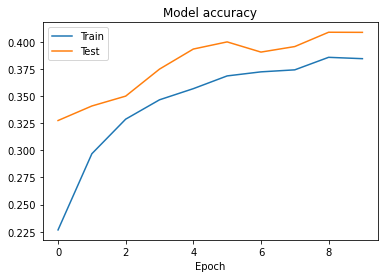

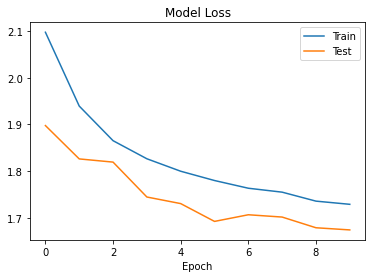

In [20]:
if __name__ == '__main__':
    main()